# ATENCAOOOOO FALTAAA EXPLORAR COM NORM, DISC, REDUCT

# NOTAAAA APRESENTAR MAIS DATA EM GRAFICOS !!!

# ORGANIZAR INFO -> FINAL

In [19]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import seaborn
import seaborn as sb

# import matplotlib
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [5]:
#Randomly remove 10%, 20%, and 30% of the values of the features of each dataset
def random_delete(dataset, percentage): 
    rows = len(dataset)
    cols = len(dataset.columns)
    total_fields = rows * cols
    rm_fields = total_fields * percentage #remove a certain number of fields accodingly to the percentage
    
    # randomly generate index locations for the new NaNs
    indices = np.random.randint(total_fields, size=rm_fields)
    row_indices = indices % rows
    col_indices = (indices / rows).astype(int)

    # assign NaN to each of the indices in data
    for i, j in zip(row_indices, col_indices):
        dataset.iloc[i, j] = np.nan

Handle Missing Values

In [6]:
#first strategie -> imputation

def imputation(dataset): 
    updated_dataset = dataset
    updated_dataset = updated_dataset.fillna('10')
    updated_dataset.info()

In [7]:
#second strategie -> Filling with a Regression Model

from sklearn.linear_model import LinearRegression

def filling_RM(dataset, field):
    lr = LinearRegression()
    dataset.head()
    testdf = dataset[dataset[field].isnull()==True]
    traindf = dataset[dataset[field].isnull()==False] #field ->''
    y = traindf[field]
    traindf.drop(field,axis=1,inplace=True)
    lr.fit(traindf,y)
    testdf.drop(field,axis=1,inplace=True) ##field ->""
    pred = lr.predict(testdf)
    testdf[field]= pred

In [8]:
df_redwine = pd.read_csv("winequality-red.csv")
df_whitewine = pd.read_csv("winequality-white.csv")
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#####normalization by applying the min-max scaling 
def normalizationData(data): 
    # create a scaler object
    scaler = MinMaxScaler()
    # fit and transform the data
    data = pd.DataFrame(scaler.fit_transform(data), columns=wine_set.columns)


In [20]:
#tecnique RandomForest
def reductionData(data): 
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    data['quality_c'] = data['quality'].map(recode)

    # split into training and testing sets
    predictors = data[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]

    targets = data.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data#
    classifier = RandomForestClassifier(n_estimators=25)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('confusion matrix:\n', sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('\naccuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

    # to display the relative importance of each predictive variable
    model = ExtraTreesClassifier()
    model.fit(pred_train, tar_train)

    print('importance of predictors:')
    dct = dict()
    for c in range(len(predictors.columns)):
        dct[predictors.columns[c]] = model.feature_importances_[c]
    print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

    # run different numbers of trees to see the effect of the number on the accuracy of the prediction
    n = 100
    accuracy = [0]*n

    for i in range(n):
        classifier = RandomForestClassifier(n_estimators=i+1)
        classifier = classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)
        accuracy[i] = sklearn.metrics.accuracy_score(tar_test, predictions)

    plt.plot(range(1, n+1), accuracy)
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy of prediction")
    plt.title("Effect of the number of trees on the prediction accuracy")
    plt.show()

    print(accuracy)

In [21]:
def discretizationData(data): #variable
    dataInteress = data["fixed acidity"]
    data.head()
    data['binned']=pd.cut(x=data['fixed acidity'], bins=[0,25,50,100,200])
    data.head()

# K_MEANS

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn.preprocessing import MinMaxScaler #normalization data 

In [15]:
def k_means(wine_set):
    #####normalization by applying the min-max scaling 
    wine_set = normalizationData(wine_set)

    # standardize predictors to have mean=0 and standardeviation=1
    pred = wine_set[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "pH", "sulphates", "alcohol", "quality"]]
    clustervar = pred.copy()

    clustervar = pd.DataFrame(preprocessing.scale(clustervar))
    clustervar.columns = pred.columns

    # split into training and testing sets
    clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)
    # print(clus_train.shape)

    # k-means cluster analysis for 1-9 clusters
    clusters = range(1, 10)
    meandist = []

    for k in clusters:
        # print(k)
        model = KMeans(n_clusters=k)
        model.fit(clus_train)
        meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))/clus_train.shape[0])

    print('Average distance from observations to the cluster centroids for 1-9 clusters:')
    print(meandist)

    # plot average distance from observations to the cluster centroid
    plt.plot(clusters, meandist)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average distance')

    plt.show()


    #  2-cluster solution proven to be the best
    model2 = KMeans(n_clusters=2)
    model2.fit(clus_train)
    # plot clusters
    pca_2 = PCA(2)
    plot_columns = pca_2.fit_transform(clus_train)
    plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=model2.labels_)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    plt.title('Canonical variables for 2 clusters')
    plt.show()

Average distance from observations to the cluster centroids for 1-9 clusters:
[3.1497710143972237, 2.849692264997806, 2.7240426803944406, 2.6522555237009198, 2.5644415040195283, 2.497557410889043, 2.444202091447687, 2.3992100260012466, 2.3521575944745954]


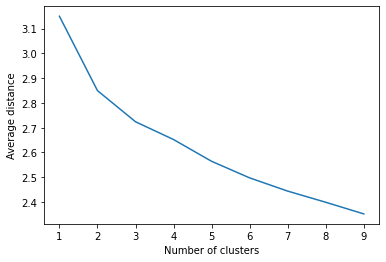

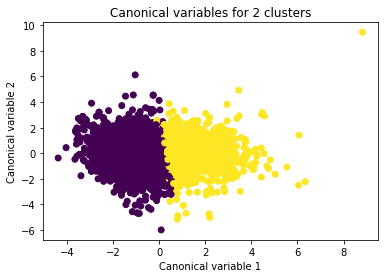

In [16]:
k_means(df_whitewine)

Average distance from observations to the cluster centroids for 1-9 clusters:
[3.0758086305911614, 2.735862981033487, 2.5534947128338232, 2.457068479136751, 2.3519746706475604, 2.2957794903212814, 2.213837975266302, 2.1648348966959765, 2.1177011814120705]


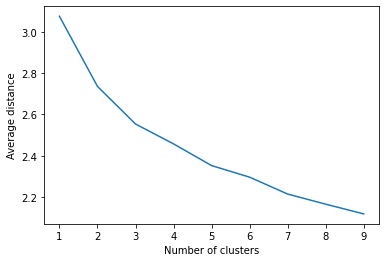

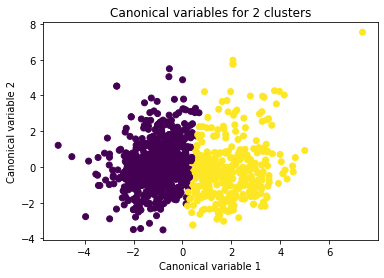

In [17]:
k_means(df_redwine)

# DBScan

In [17]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler #normalization

In [19]:
X = StandardScaler().fit_transform(df_redwine)
db = DBSCAN(eps=3, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 12
Estimated number of noise points: 15
Silhouette Coefficient: 0.219


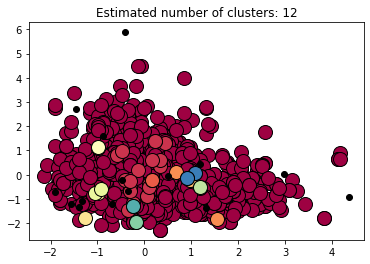

In [20]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# Agglomerative hierarchical clustering

In [21]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

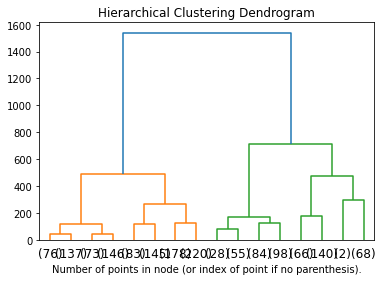

In [22]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
X= df_redwine
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

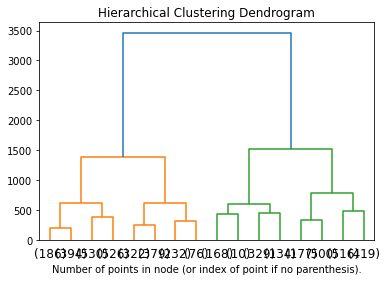

In [23]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
X= df_whitewine
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()